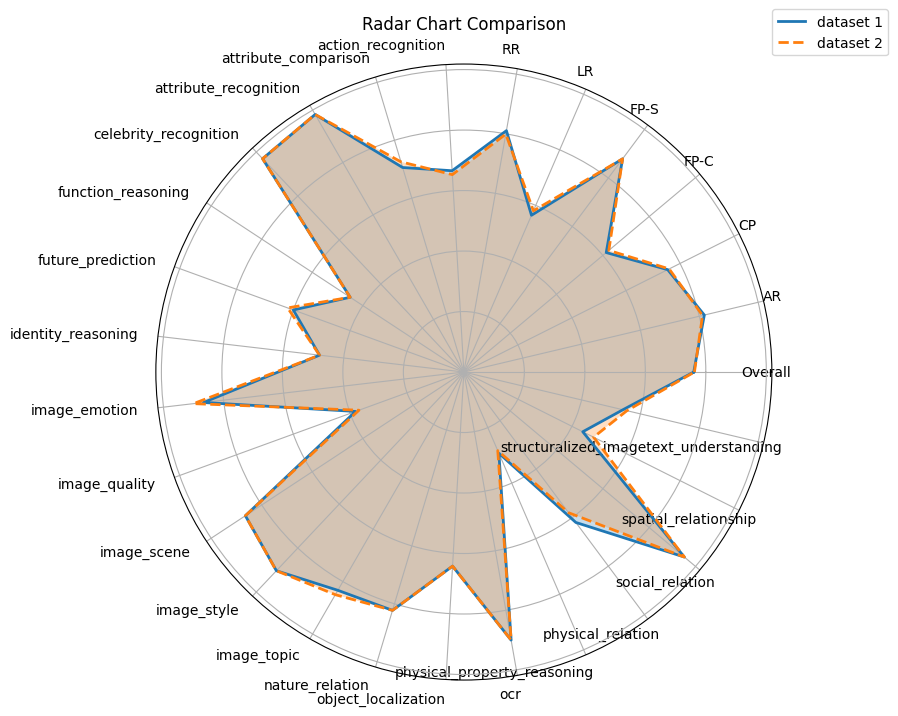

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_csv(file_path):
    """ 读取CSV文件并返回指标名称和数值 """
    df = pd.read_csv(file_path)
    categories = df.columns[1:].tolist()  # 除去 "split" 列的其他列
    values = df.iloc[0, 1:].values  # 获取第一行（"dev"）的数据
    
    # 找到所有与 "reasoning" 相关的列，并进行除5操作
    reasoning_columns = [col for col in categories if "reasoning" in col]
    reasoning_indices = [categories.index(col) for col in reasoning_columns]
    
    # 对 "reasoning" 列的值进行除以5
    for idx in reasoning_indices:
        values[idx] /= 2
    
    return categories, values

# 读取两个CSV文件的数据
categories, values1 = read_csv("/home/scm/MLLM-Attention/results_of_Qwen2-VL-7B-Instruct_on_MMBench_DEV_EN_V11_LS0.6_KP1.0_ILTrue_256/Qwen2-VL-7B-Instruct/Qwen2-VL-7B-Instruct_MMBench_DEV_EN_V11_acc.csv")  # 替换为你的第一个CSV文件路径
_, values2 = read_csv("/home/scm/MLLM-Attention/results_of_Qwen2-VL-7B-Instruct_on_MMBench_DEV_EN_V11_LS0.6_KP0.3_ILTrue_256/Qwen2-VL-7B-Instruct/Qwen2-VL-7B-Instruct_MMBench_DEV_EN_V11_acc.csv")  # 替换为你的第二个CSV文件路径

# 计算角度
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# 闭合图形
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))
angles += [angles[0]]

# 画雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values1, label="dataset 1", linestyle='solid', linewidth=2)
ax.fill(angles, values1, alpha=0.25)

ax.plot(angles, values2, label="dataset 2", linestyle='dashed', linewidth=2)
ax.fill(angles, values2, alpha=0.25)

# 设置图例和标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha="right")
ax.set_yticklabels([])  # 隐藏径向刻度
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.title("Radar Chart Comparison")
plt.show()
